In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical, img_to_array, array_to_img
from sklearn.metrics import classification_report

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape([-1, 784])
x_train=np.dstack([x_train]*3)
x_train = x_train.reshape(-1, 28, 28, 3)
x_train=np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_train = x_train.astype('float32') / 255.
print('x_train shape:', x_train.shape)

x_test = x_test.reshape([-1, 784])
x_test=np.dstack([x_test]*3)
x_test = x_test.reshape(-1, 28, 28, 3)
x_test=np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_test = x_test.astype('float32') / 255.
print('x_test shape:', x_test.shape)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train shape: (60000, 48, 48, 3)
x_test shape: (10000, 48, 48, 3)


In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Epoch 1/20
375/375 [==============================] - 285s 758ms/step - loss: 0.6919 - accuracy: 0.7622 - val_loss: 0.4502 - val_accuracy: 0.8378
Epoch 2/20
375/375 [==============================] - 314s 838ms/step - loss: 0.4631 - accuracy: 0.8339 - val_loss: 0.4018 - val_accuracy: 0.8522
Epoch 3/20
375/375 [==============================] - 338s 901ms/step - loss: 0.4171 - accuracy: 0.8498 - val_loss: 0.3777 - val_accuracy: 0.8634
Epoch 4/20
375/375 [==============================] - 334s 890ms/step - loss: 0.3916 - accuracy: 0.8569 - val_loss: 0.3646 - val_accuracy: 0.8658
Epoch 5/20
375/375 [==============================] - 344s 917ms/step - loss: 0.3757 - accuracy: 0.8643 - val_loss: 0.3487 - val_accuracy: 0.8723
Epoch 6/20
375/375 [==============================] - 337s 898ms/step - loss: 0.3623 - accuracy: 0.8683 - val_loss: 0.3433 - val_accuracy: 0.8748
Epoch 7/20
375/375 [==============================] - 335s 894ms/step - loss: 0.3521 - accuracy: 0.8735 - val_loss: 0.3348 -

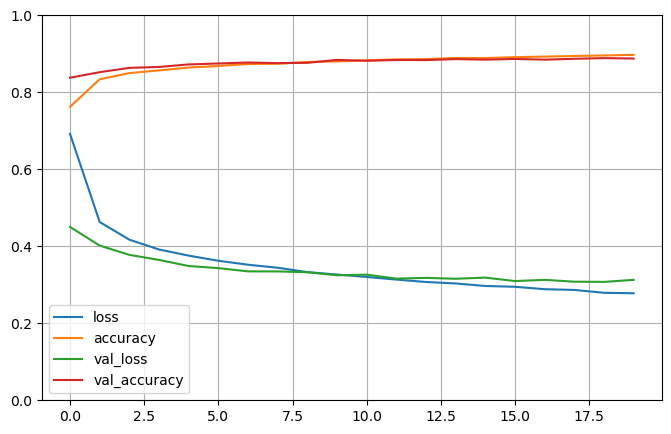

1875/1875 [==============================] - 376s 200ms/step - loss: 0.2490 - accuracy: 0.9080
Train accuracy: 0.9080
313/313 [==============================] - 63s 201ms/step - loss: 0.3379 - accuracy: 0.8809
Test accuracy: 0.8809
313/313 [==============================] - 63s 199ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.91      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.80      0.85      0.82      1000
       Dress       0.88      0.86      0.87      1000
        Coat       0.82      0.77      0.79      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.75      0.59      0.66      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weight

In [10]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

In [11]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 7213322 (27.52 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________
Epoch 1/

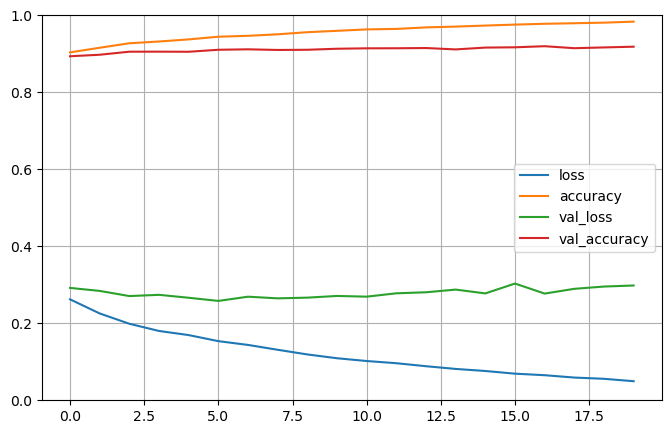

1875/1875 [==============================] - 402s 214ms/step - loss: 0.0817 - accuracy: 0.9782
Train accuracy: 0.9782
313/313 [==============================] - 64s 206ms/step - loss: 0.3277 - accuracy: 0.9153
Test accuracy: 0.9153
313/313 [==============================] - 62s 198ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.89      0.87      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.87      0.87      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.77      0.72      0.75      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weight

In [12]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5
                             ), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)